In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
# Importing necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# loading the dataset and printing out top five observations
data= pd.read_csv("../input/bank-data/case_study_data.csv")
data.head()

,checkin_acc,duration,credit_history,purpose,amount,svaing_acc,present_emp_since,inst_rate,personal_status,other_debtors,...,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
0,A11,9,A34,A43,1754,A65,A75,6,A93,A101,...,A121,101,A143,A152,3,A173,2,A192,A201,1
1,A12,72,A32,A43,8927,A61,A73,3,A92,A101,...,A121,33,A143,A152,2,A173,2,A191,A201,2
2,A14,18,A34,A46,3144,A61,A74,3,A93,A101,...,A121,74,A143,A152,2,A172,3,A191,A201,1
3,A11,63,A32,A42,11823,A61,A74,3,A93,A103,...,A122,68,A143,A153,2,A173,3,A191,A201,1
4,A11,36,A33,A40,7305,A61,A73,5,A93,A101,...,A124,80,A143,A153,3,A173,3,A191,A201,2


In [9]:
# Drawing necessary information from data as no. of rows, no. of columns , datatype of each column, missing observations.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   purpose            1000 non-null   object
 4   amount             1000 non-null   int64 
 5   svaing_acc         1000 non-null   object
 6   present_emp_since  1000 non-null   object
 7   inst_rate          1000 non-null   int64 
 8   personal_status    1000 non-null   object
 9   other_debtors      1000 non-null   object
 10  residing_since     1000 non-null   int64 
 11  property           1000 non-null   object
 12  age                1000 non-null   int64 
 13  inst_plans         1000 non-null   object
 14  housing            1000 non-null   object
 15  num_credits        1000 non-null   int64 
 16  job                1000 non-null   object
 

There are 1000 rows and 21 columns and we do not have any missing observation in the dataset.

#  **Exploratory Data Analysis and Feature Selection.**

In [10]:
# Exploratory Data Analysis (Descriptive Statistics for different numerical columns)
data.describe()

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,status
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,31.449000,4907.134000,4.606000,4.407000,53.566000,2.441000,2.155000,1.300000
std,18.055564,4234.100176,1.572016,1.570292,17.065664,0.697858,0.362086,0.458487
min,6.000000,375.000000,2.000000,2.000000,29.000000,2.000000,2.000000,1.000000
25%,18.000000,2048.250000,3.000000,3.000000,41.000000,2.000000,2.000000,1.000000
50%,27.000000,3479.500000,5.000000,5.000000,50.000000,2.000000,2.000000,1.000000
75%,36.000000,5958.500000,6.000000,6.000000,63.000000,3.000000,2.000000,2.000000
max,108.000000,27636.000000,6.000000,6.000000,113.000000,6.000000,3.000000,2.000000


In [11]:
# For categorical columns
data.describe(include=np.object)

,checkin_acc,credit_history,purpose,svaing_acc,present_emp_since,personal_status,other_debtors,property,inst_plans,housing,job,telephone,foreign_worker
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,3,4,3,3,4,2,2
top,A14,A32,A43,A61,A73,A93,A101,A123,A143,A152,A173,A191,A201
freq,394,530,280,603,339,548,907,332,814,713,630,596,963


<AxesSubplot:>

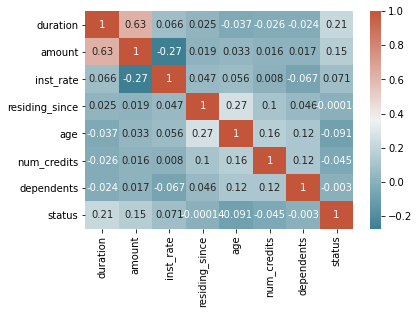

In [12]:
# To check if independent variables are linearly related to each other (i.e. multicollinearity) and if there exists any relationship between independent variable and target variable.
corr= data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

1. There exists no multicollinearity between independent variables.
2. 'residing_since','num_credits', and 'dependents' are not significantly related to target variable. Hence we can drop these variables.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


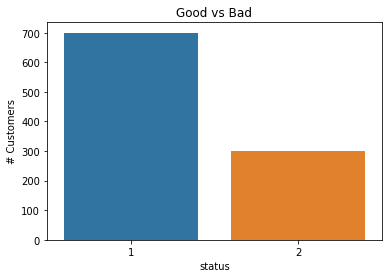

In [13]:
# Distribution of Customers
sns.countplot(data['status'])
plt.title('Good vs Bad')
plt.ylabel('# Customers')
plt.show()


Text(0.5, 1.0, 'dependents')

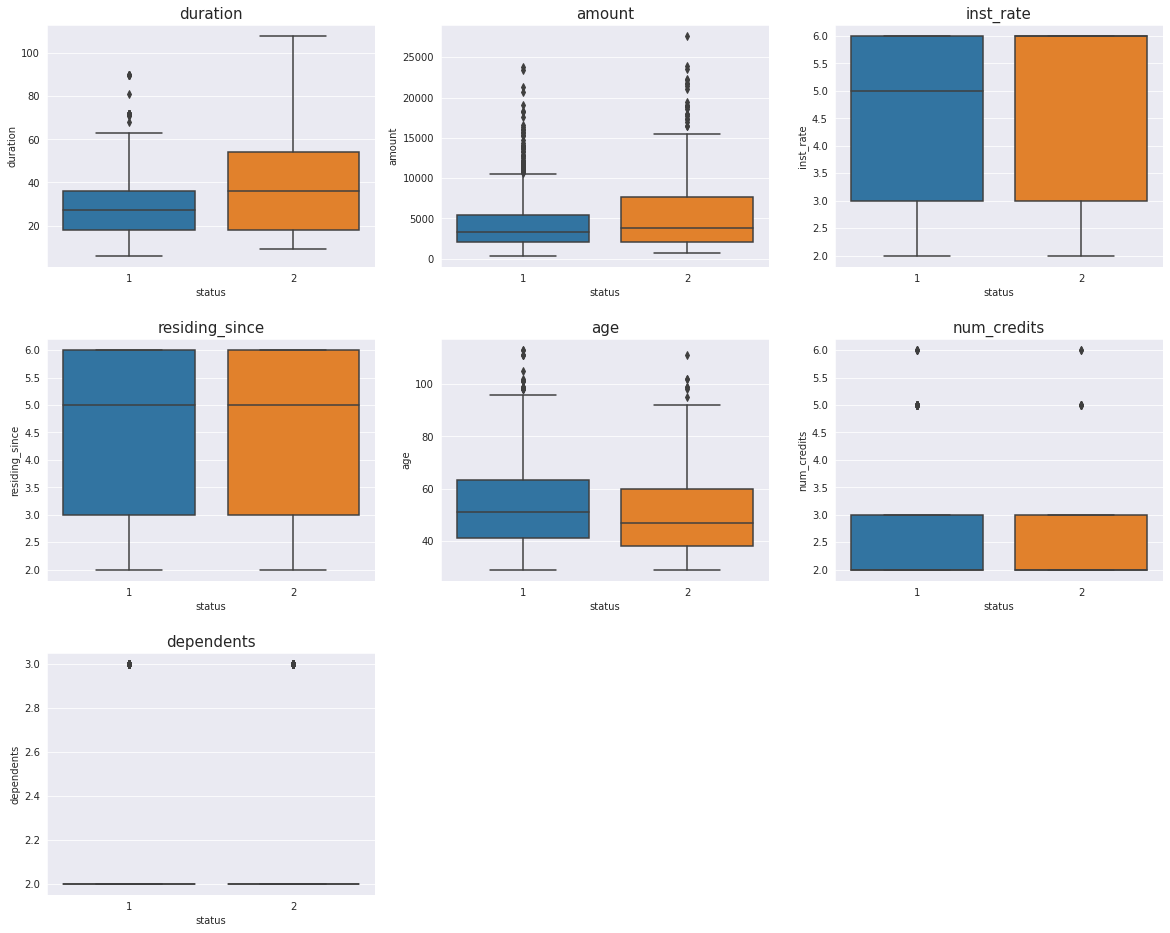

In [15]:
# Analysis of Continuous variables with respect to Target variable.
num_features= data.select_dtypes(include='number')
sns.set_style('darkgrid')
fig = plt.figure(figsize = (20,16))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(331)
ax1=sns.boxplot(x=data['status'],y=num_features['duration'],orient='v')
ax1.set_xlabel('status', fontsize = 10)
ax1.set_ylabel('duration',fontsize = 10)
ax1.set_title('duration',fontsize = 15)

ax1 = fig.add_subplot(332)
ax1=sns.boxplot(x=data['status'],y=num_features['amount'],orient='v')
ax1.set_xlabel('status', fontsize = 10)
ax1.set_ylabel('amount',fontsize = 10)
ax1.set_title('amount',fontsize = 15)

ax1 = fig.add_subplot(333)
ax1=sns.boxplot(x=data['status'],y=num_features['inst_rate'],orient='v')
ax1.set_xlabel('status', fontsize = 10)
ax1.set_ylabel('inst_rate',fontsize = 10)
ax1.set_title('inst_rate',fontsize = 15)

ax1 = fig.add_subplot(334)
ax1=sns.boxplot(x=data['status'],y=num_features['residing_since'],orient='v')
ax1.set_xlabel('status', fontsize = 10)
ax1.set_ylabel('residing_since',fontsize = 10)
ax1.set_title('residing_since',fontsize = 15)

ax1 = fig.add_subplot(335)
ax1=sns.boxplot(x=data['status'],y=num_features['age'],orient='v')
ax1.set_xlabel('status', fontsize = 10)
ax1.set_ylabel('age',fontsize = 10)
ax1.set_title('age',fontsize = 15)

ax1 = fig.add_subplot(336)
ax1=sns.boxplot(x=data['status'],y=num_features['num_credits'],orient='v')
ax1.set_xlabel('status', fontsize = 10)
ax1.set_ylabel('num_credits',fontsize = 10)
ax1.set_title('num_credits',fontsize = 15)

ax1 = fig.add_subplot(337)
ax1=sns.boxplot(x=data['status'],y=num_features['dependents'],orient='v')
ax1.set_xlabel('status', fontsize = 10)
ax1.set_ylabel('dependents',fontsize = 10)
ax1.set_title('dependents',fontsize = 15)

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


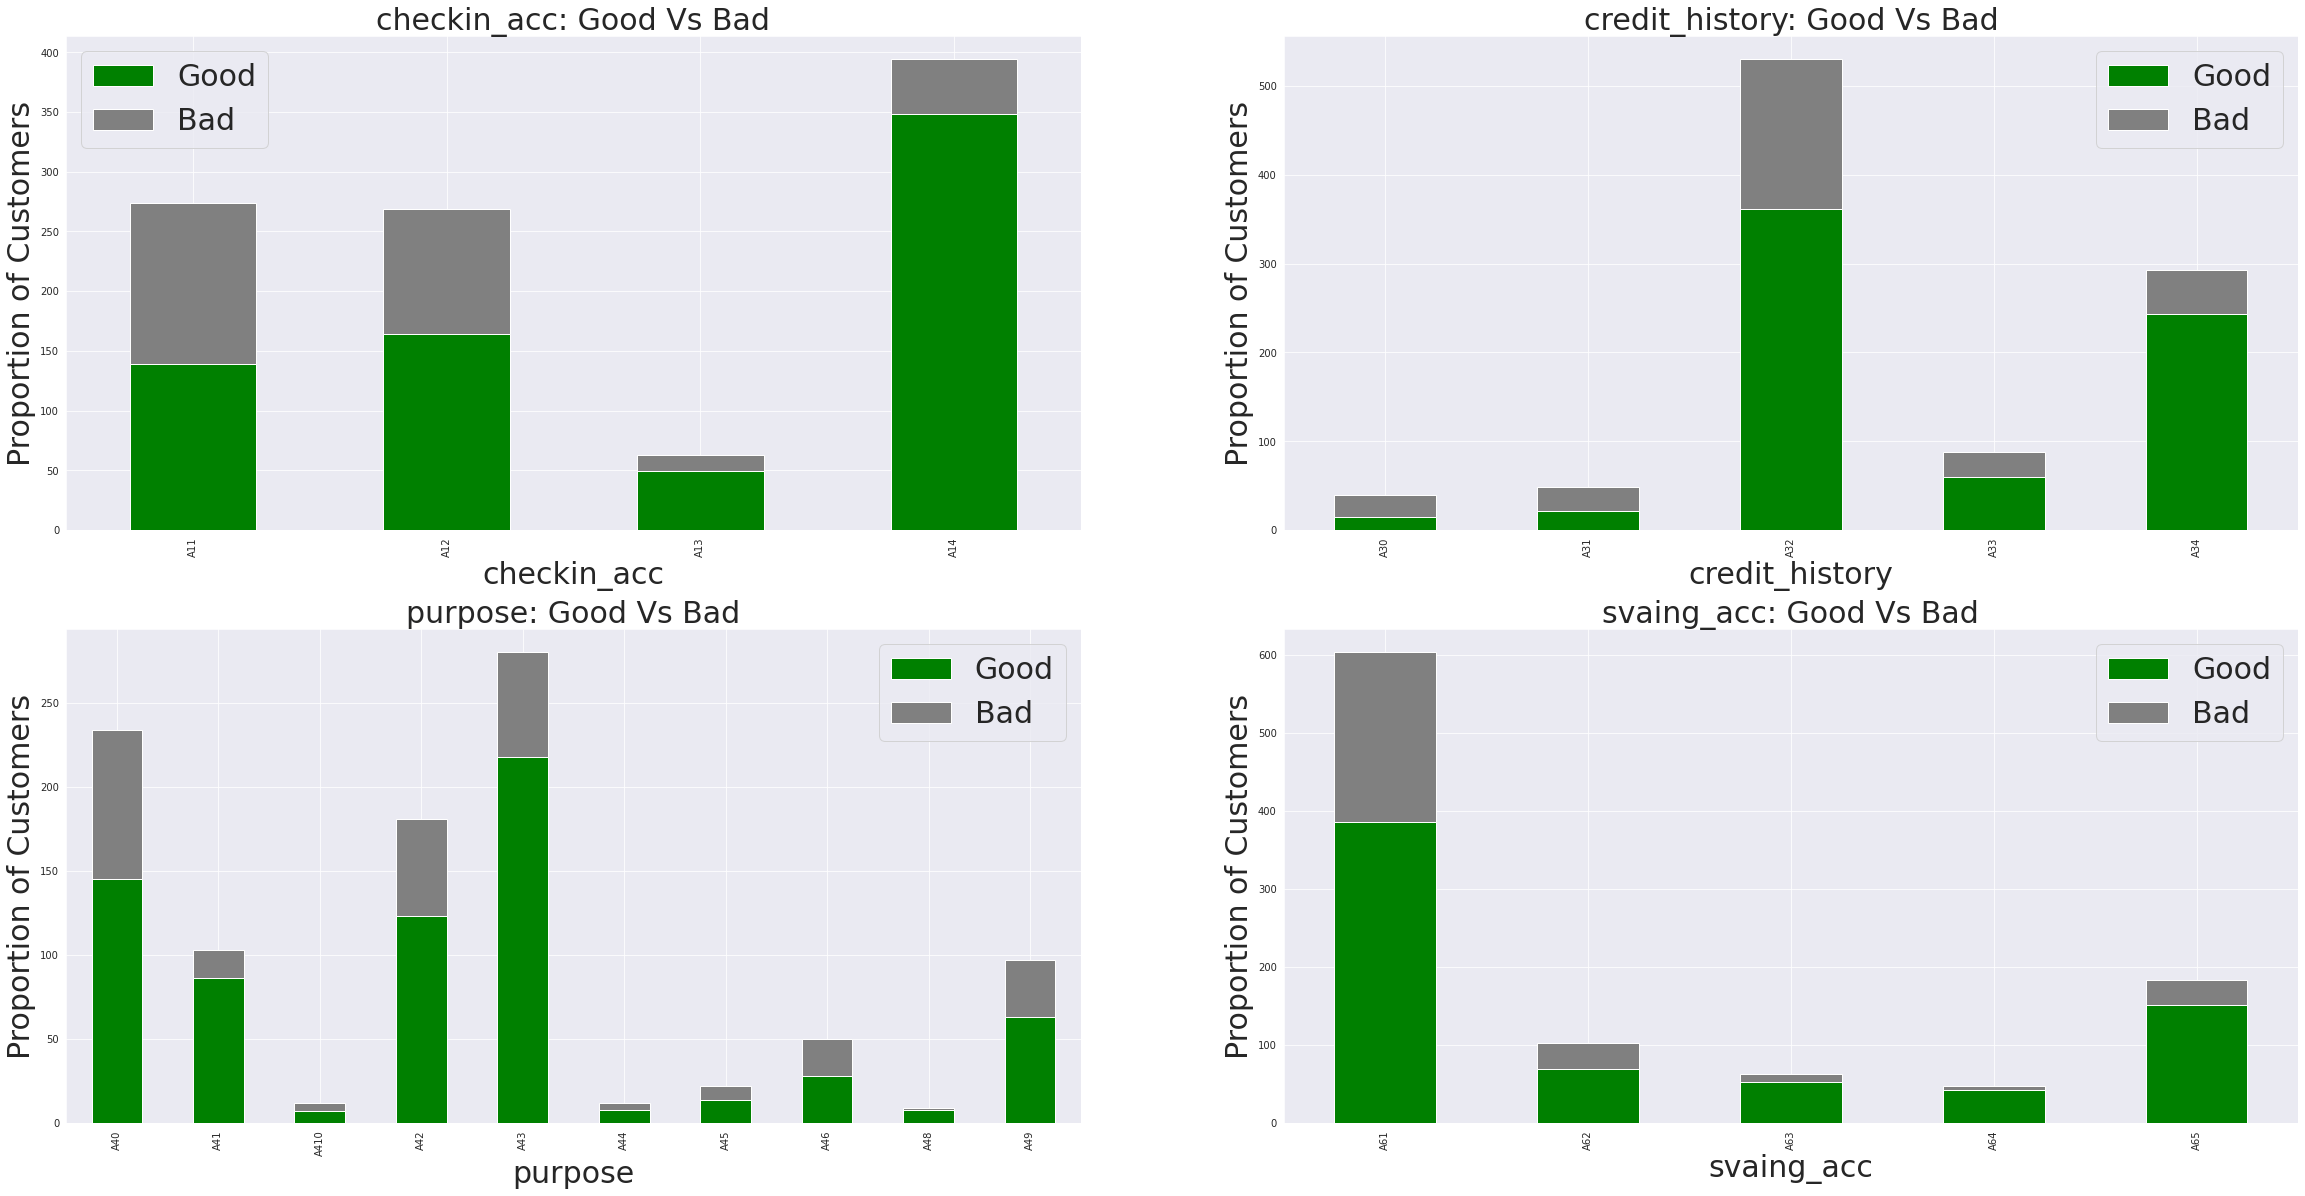

In [16]:
# Analysis of categorical variables with respect to Target variable.
f,axes= plt.subplots(2,2, figsize = (40,20))
g1= data.groupby(['checkin_acc','status']).checkin_acc.count().unstack()
p1= g1.plot(kind = 'bar', stacked = True,  
                    color = ['green','grey'],
                     ax = axes[0,0])
p1.set_xlabel('checkin_acc',size =30)
p1.set_ylabel('Proportion of Customers',size =30)
p1.set_title('checkin_acc: Good Vs Bad',size=30)
p1.legend(['Good','Bad'],prop={"size":30})

g2= data.groupby(['credit_history','status']).credit_history.count().unstack()
p2= g2.plot(kind = 'bar', stacked = True,  
                    color = ['green','grey'],
                     ax = axes[0,1])
p2.set_xlabel('credit_history',size =30)
p2.set_ylabel('Proportion of Customers',size =30)
p2.set_title('credit_history: Good Vs Bad',size=30)
p2.legend(['Good','Bad'],prop={"size":30})

g3= data.groupby(['purpose','status']).purpose.count().unstack()
p3= g3.plot(kind = 'bar', stacked = True,  
                    color = ['green','grey'],
                     ax = axes[1,0])
p3.set_xlabel('purpose',size =30)
p3.set_ylabel('Proportion of Customers',size =30)
p3.set_title('purpose: Good Vs Bad',size=30)
p3.legend(['Good','Bad'],prop={"size":30})

g4= data.groupby(['svaing_acc','status']).svaing_acc.count().unstack()
p4= g4.plot(kind = 'bar', stacked = True,  
                    color = ['green','grey'],
                     ax = axes[1,1])
p4.set_xlabel('svaing_acc',size =30)
p4.set_ylabel('Proportion of Customers',size =30)
p4.set_title('svaing_acc: Good Vs Bad',size=30)
p4.legend(['Good','Bad'],prop={"size":30})



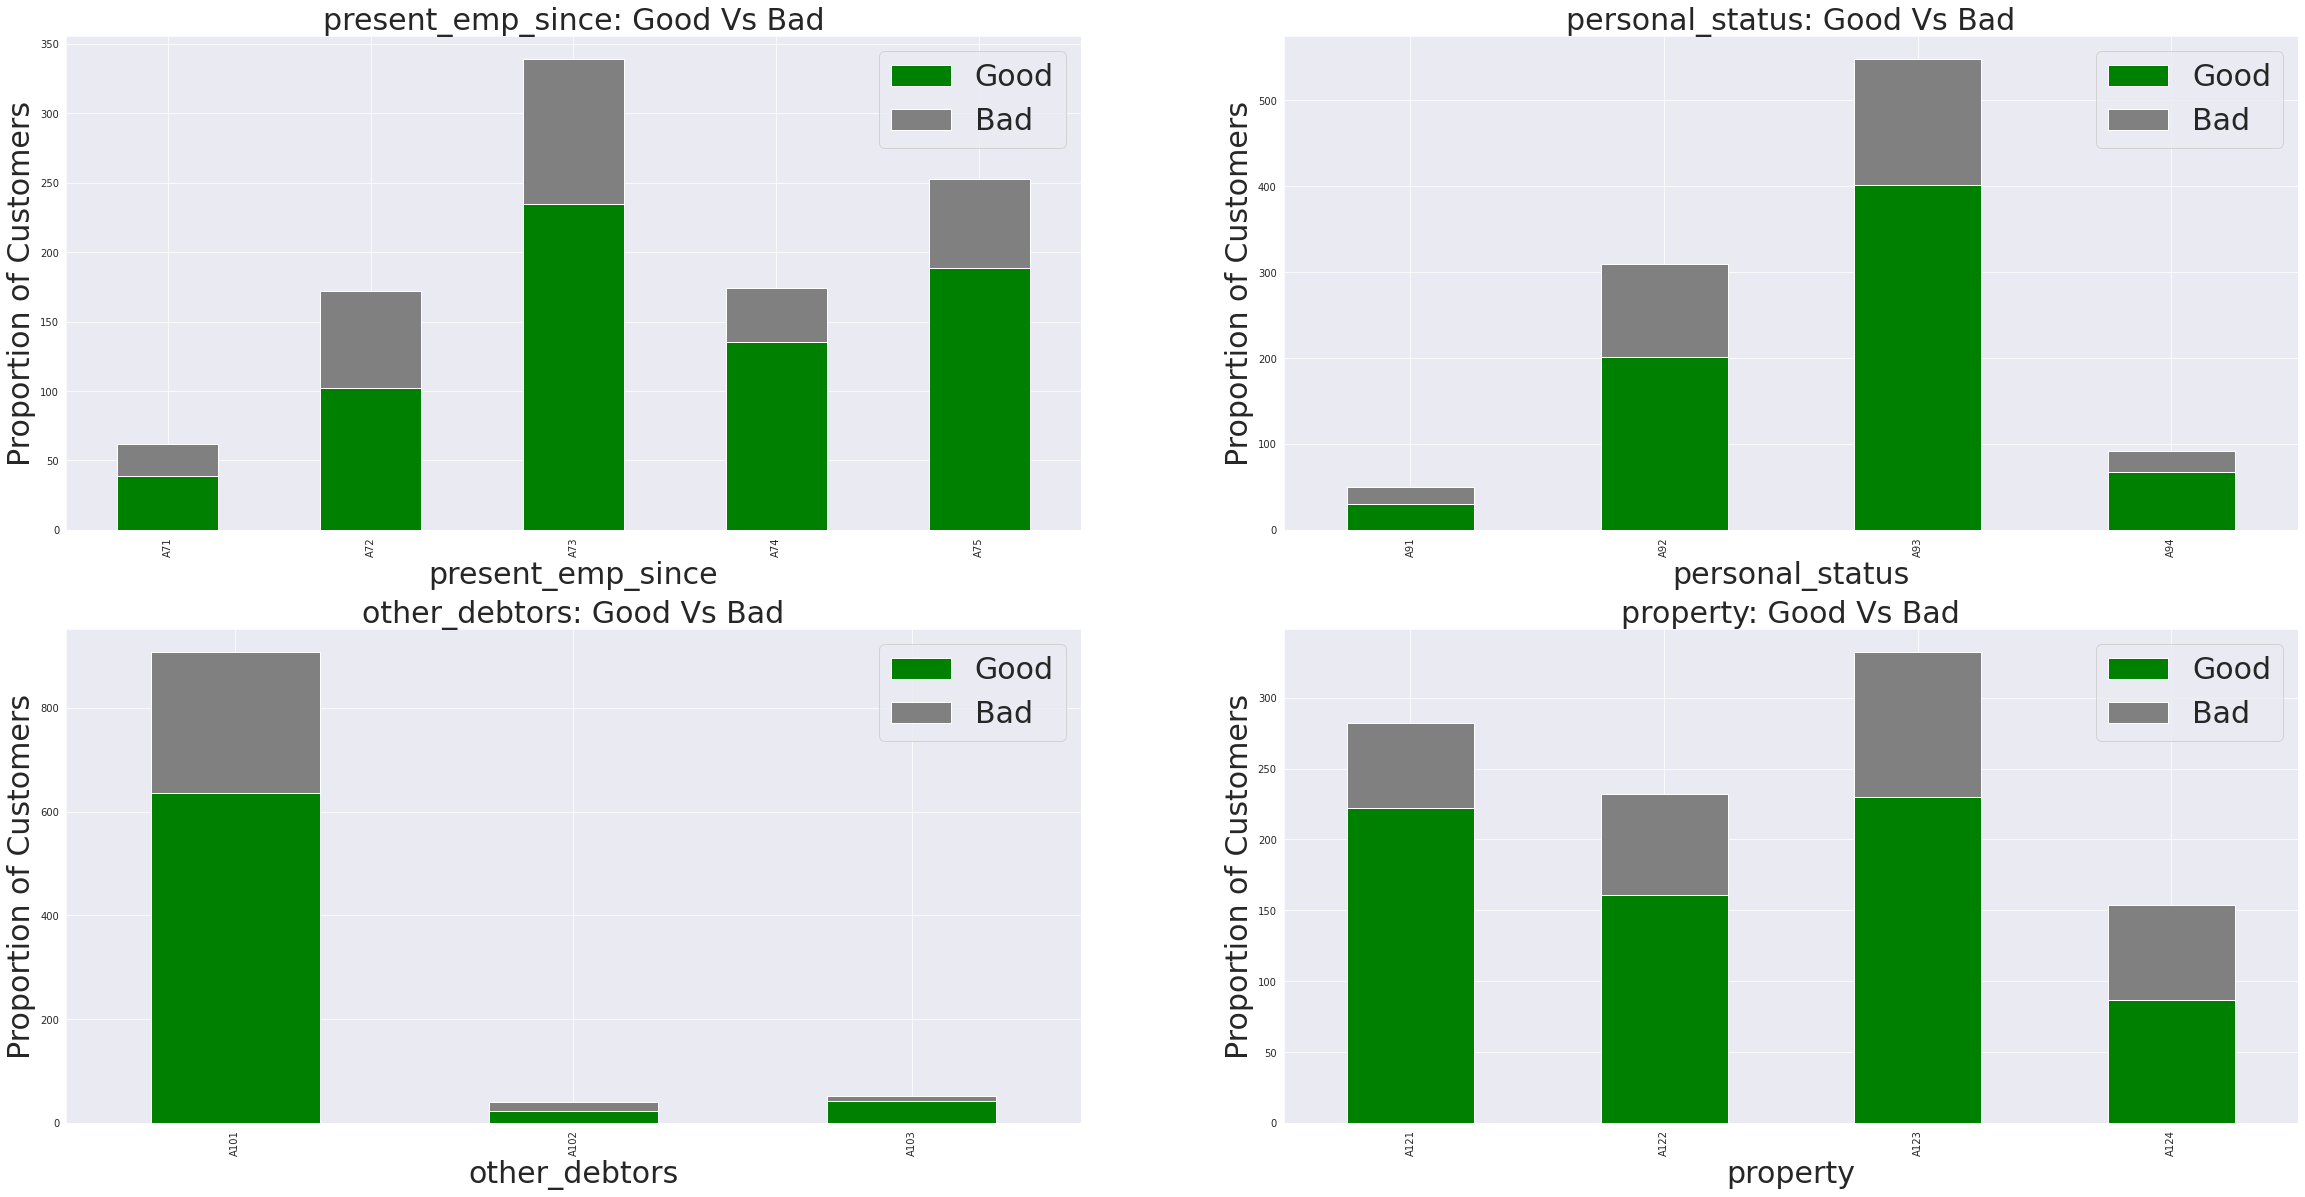

In [17]:
# Analysis of categorical variables with respect to Target variable.
f,axes= plt.subplots(2,2, figsize = (40,20))
g1= data.groupby(['present_emp_since','status']).present_emp_since.count().unstack()
p1= g1.plot(kind = 'bar', stacked = True,  
                    color = ['green','grey'],
                     ax = axes[0,0])
p1.set_xlabel('present_emp_since',size =30)
p1.set_ylabel('Proportion of Customers',size =30)
p1.set_title('present_emp_since: Good Vs Bad',size=30)
p1.legend(['Good','Bad'],prop={"size":30})

g2= data.groupby(['personal_status','status']).personal_status.count().unstack()
p2= g2.plot(kind = 'bar', stacked = True,  
                    color = ['green','grey'],
                     ax = axes[0,1])
p2.set_xlabel('personal_status',size =30)
p2.set_ylabel('Proportion of Customers',size =30)
p2.set_title('personal_status: Good Vs Bad',size=30)
p2.legend(['Good','Bad'],prop={"size":30})

g3= data.groupby(['other_debtors','status']).other_debtors.count().unstack()
p3= g3.plot(kind = 'bar', stacked = True,  
                    color = ['green','grey'],
                     ax = axes[1,0])
p3.set_xlabel('other_debtors',size =30)
p3.set_ylabel('Proportion of Customers',size =30)
p3.set_title('other_debtors: Good Vs Bad',size=30)
p3.legend(['Good','Bad'],prop={"size":30})

g4= data.groupby(['property','status']).property.count().unstack()
p4= g4.plot(kind = 'bar', stacked = True,  
                    color = ['green','grey'],
                     ax = axes[1,1])
p4.set_xlabel('property',size =30)
p4.set_ylabel('Proportion of Customers',size =30)
p4.set_title('property: Good Vs Bad',size=30)
p4.legend(['Good','Bad'],prop={"size":30})


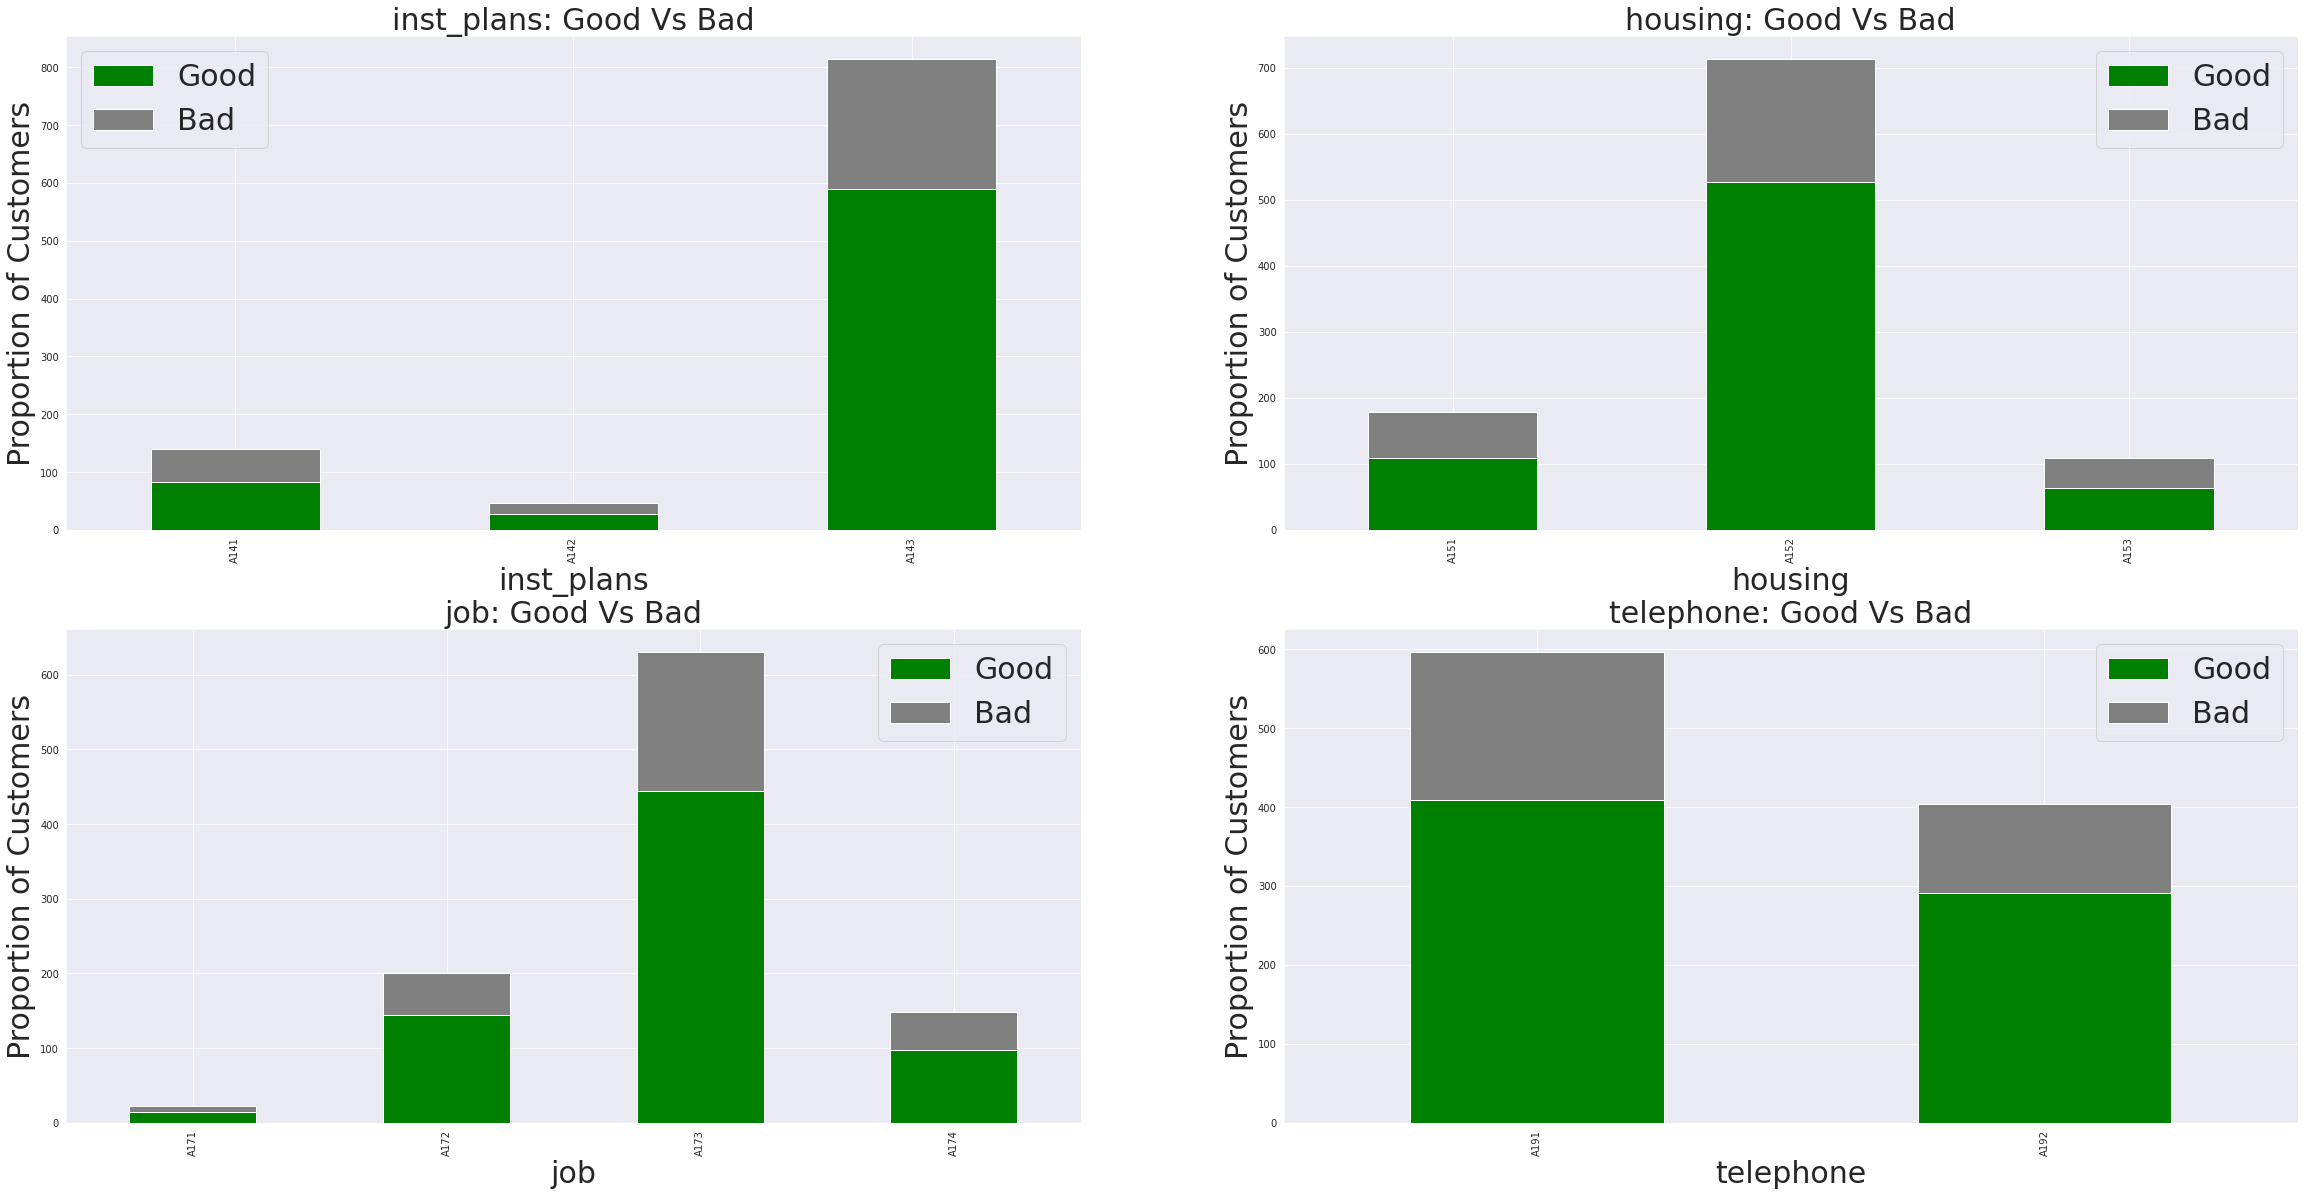

In [18]:
# Analysis of categorical variables with respect to Target variable.
f,axes= plt.subplots(2,2, figsize = (40,20))
g1= data.groupby(['inst_plans','status']).inst_plans.count().unstack()
p1= g1.plot(kind = 'bar', stacked = True,  
                    color = ['green','grey'],
                     ax = axes[0,0])
p1.set_xlabel('inst_plans',size =30)
p1.set_ylabel('Proportion of Customers',size =30)
p1.set_title('inst_plans: Good Vs Bad',size=30)
p1.legend(['Good','Bad'],prop={"size":30})

g2= data.groupby(['housing','status']).housing.count().unstack()
p2= g2.plot(kind = 'bar', stacked = True,  
                    color = ['green','grey'],
                     ax = axes[0,1])
p2.set_xlabel('housing',size =30)
p2.set_ylabel('Proportion of Customers',size =30)
p2.set_title('housing: Good Vs Bad',size=30)
p2.legend(['Good','Bad'],prop={"size":30})

g3= data.groupby(['job','status']).job.count().unstack()
p3= g3.plot(kind = 'bar', stacked = True,  
                    color = ['green','grey'],
                     ax = axes[1,0])
p3.set_xlabel('job',size =30)
p3.set_ylabel('Proportion of Customers',size =30)
p3.set_title('job: Good Vs Bad',size=30)
p3.legend(['Good','Bad'],prop={"size":30})

g4= data.groupby(['telephone','status']).telephone.count().unstack()
p4= g4.plot(kind = 'bar', stacked = True,  
                    color = ['green','grey'],
                     ax = axes[1,1])
p4.set_xlabel('telephone',size =30)
p4.set_ylabel('Proportion of Customers',size =30)
p4.set_title('telephone: Good Vs Bad',size=30)
p4.legend(['Good','Bad'],prop={"size":30})


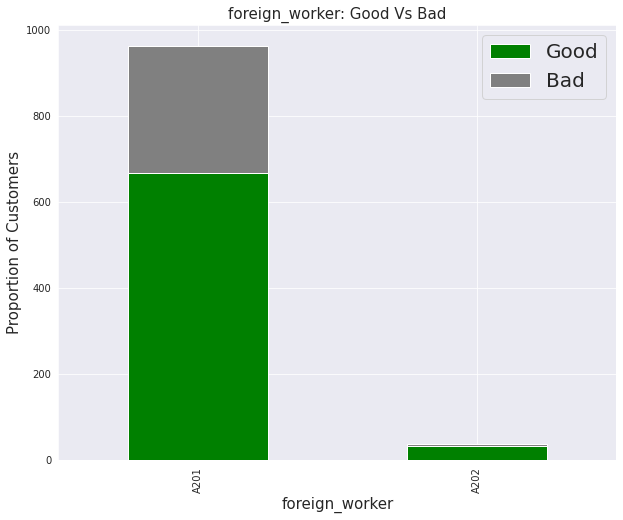

In [19]:
# Analysis of categorical variable (foreign_worker) with respect to Target variable.
f,axes= plt.subplots(1,1, figsize = (10,8))
g1= data.groupby(['foreign_worker','status']).foreign_worker.count().unstack()
p1= g1.plot(kind = 'bar', stacked = True,  
                    color = ['green','grey'],
                     ax=axes)
p1.set_xlabel('foreign_worker',size =15)
p1.set_ylabel('Proportion of Customers',size =15)
p1.set_title('foreign_worker: Good Vs Bad',size=15)
p1.legend(['Good','Bad'],prop={"size":20})


In [20]:
# Dropping the insignificant variables. 
data2= data.drop(['residing_since','num_credits','dependents'],axis=1)
data2.head(3)

,checkin_acc,duration,credit_history,purpose,amount,svaing_acc,present_emp_since,inst_rate,personal_status,other_debtors,property,age,inst_plans,housing,job,telephone,foreign_worker,status
0,A11,9,A34,A43,1754,A65,A75,6,A93,A101,A121,101,A143,A152,A173,A192,A201,1
1,A12,72,A32,A43,8927,A61,A73,3,A92,A101,A121,33,A143,A152,A173,A191,A201,2
2,A14,18,A34,A46,3144,A61,A74,3,A93,A101,A121,74,A143,A152,A172,A191,A201,1


# **Model Building**

In [21]:
# Converting categorical variable into dummy variables.
data3= pd.get_dummies(data2, columns=['checkin_acc','credit_history','purpose','svaing_acc','present_emp_since','personal_status',
                                      'other_debtors','property','inst_plans','housing','job',
                                      'telephone','foreign_worker'],drop_first=True)
data3.head(3)


,duration,amount,inst_rate,age,status,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14,credit_history_A31,credit_history_A32,...,property_A124,inst_plans_A142,inst_plans_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,telephone_A192,foreign_worker_A202
0,9,1754,6,101,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
1,72,8927,3,33,2,1,0,0,0,1,...,0,0,1,1,0,0,1,0,0,0
2,18,3144,3,74,1,0,0,1,0,0,...,0,0,1,1,0,1,0,0,0,0


In [22]:
# Final Dataset used for Model Building.
data3.to_csv('processed_data',index=False)

In [23]:
features_X=data3.drop('status',axis=True)
y=data3['status']

# **1. Model Building Using Logistic Regression**

In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(features_X)
X_scaled=scaler.transform(features_X)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
logreg=LogisticRegression()
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=28)
logreg.fit(X_train,y_train)
y_pred_log=logreg.predict(X_test)
logreg.score(X_test,y_test)

0.7633333333333333

In [25]:
confusion_matrix(y_test,y_pred_log)

array([[177,  19],
       [ 52,  52]])

In [26]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           1       0.77      0.90      0.83       196
           2       0.73      0.50      0.59       104

    accuracy                           0.76       300
   macro avg       0.75      0.70      0.71       300
weighted avg       0.76      0.76      0.75       300



# **2. Model Building Using Support Vector Machine**

In [27]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
y_pred_svc=svc.predict(X_test)
svc.score(X_test,y_test)

0.7333333333333333

In [28]:
confusion_matrix(y_test,y_pred_svc)

array([[189,   7],
       [ 73,  31]])

In [29]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           1       0.72      0.96      0.83       196
           2       0.82      0.30      0.44       104

    accuracy                           0.73       300
   macro avg       0.77      0.63      0.63       300
weighted avg       0.75      0.73      0.69       300



# **3. Model Building Using Decision Tree**

In [30]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred_dtree = dtree.predict(X_test)
dtree.score(X_test,y_test)

0.6733333333333333

In [31]:
confusion_matrix(y_test,y_pred_dtree)

array([[154,  42],
       [ 56,  48]])

In [32]:
print(classification_report(y_test,y_pred_dtree))

              precision    recall  f1-score   support

           1       0.73      0.79      0.76       196
           2       0.53      0.46      0.49       104

    accuracy                           0.67       300
   macro avg       0.63      0.62      0.63       300
weighted avg       0.66      0.67      0.67       300



# **4. Model Building Using K-Nearest Neighbour**

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
param_grid={'n_neighbors':np.arange(1,50)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [34]:
knn_cv.best_params_

{'n_neighbors': 14}

In [35]:
knn_cv.best_score_

0.7385714285714287

In [36]:
knn_1= KNeighborsClassifier(n_neighbors=14)
knn_1.fit(X_train,y_train)
knn_1.predict(X_test)
knn_1.score(X_test,y_test)

0.6933333333333334